## EDA & Data preprocessing

##### **Objective**:

The goal of this project is to predict the success of restaurants in Bengaluru using various features such as rating, cost, location, cuisines, online order availability, and more. This will help identify what factors contribute to a restaurant being successful and provide insights for restaurant owners, food delivery apps, or data analysts.



Dataset Overview:


 We are using the Zomato Bengaluru Restaurants Dataset, which contains detailed information about thousands of restaurants, including:

- Basic info like restaurant name, address, and location
- Operational features like online order availability and table booking
- Customer engagement through ratings, reviews, and votes
- Cuisine type and restaurant category
- Pricing details for two people



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:\Users\raich\Desktop\zomato\Bengaluru_Restaurant_Success_Predictor\Data\zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [7]:
df.nunique()

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

In [8]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Online Order Distribution

Text(0.5, 1.0, 'Online Order Distribution')

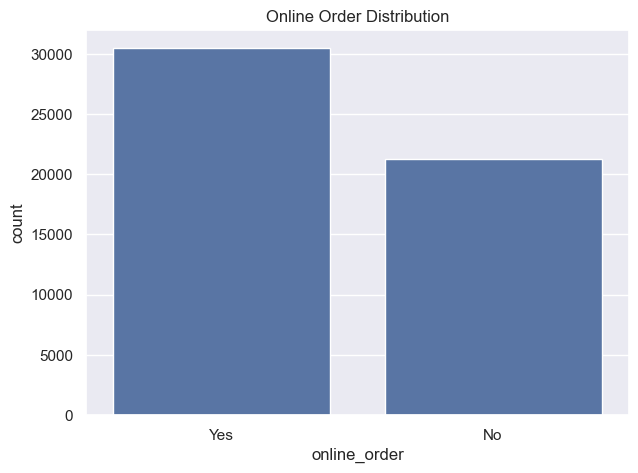

In [10]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x='online_order', data=df, order=df['online_order'].value_counts().index)
plt.title('Online Order Distribution')

book_table Distribution

Text(0.5, 1.0, 'book_table Distribution')

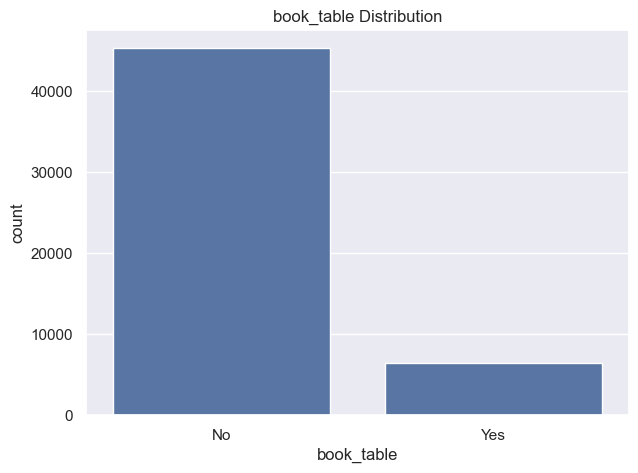

In [11]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x='book_table', data=df, order=df['book_table'].value_counts().index)
plt.title('book_table Distribution')

location

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'BTM'),
  Text(1, 0, 'HSR'),
  Text(2, 0, 'Koramangala 5th Block'),
  Text(3, 0, 'JP Nagar'),
  Text(4, 0, 'Whitefield'),
  Text(5, 0, 'Indiranagar'),
  Text(6, 0, 'Jayanagar'),
  Text(7, 0, 'Marathahalli'),
  Text(8, 0, 'Bannerghatta Road'),
  Text(9, 0, 'Bellandur')])

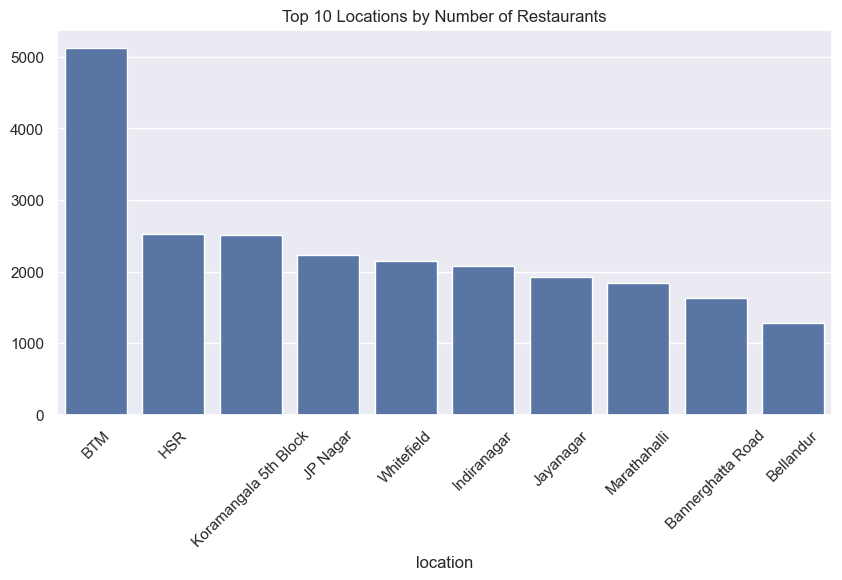

In [12]:
location_counts = df['location'].value_counts().nlargest(10)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x=location_counts.index, y=location_counts.values)
plt.title('Top 10 Locations by Number of Restaurants')
plt.xticks(rotation=45)

Restaurants Types

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Quick Bites'),
  Text(1, 0, 'Casual Dining'),
  Text(2, 0, 'Cafe'),
  Text(3, 0, 'Delivery'),
  Text(4, 0, 'Dessert Parlor'),
  Text(5, 0, 'Takeaway, Delivery'),
  Text(6, 0, 'Casual Dining, Bar'),
  Text(7, 0, 'Bakery'),
  Text(8, 0, 'Beverage Shop'),
  Text(9, 0, 'Bar')])

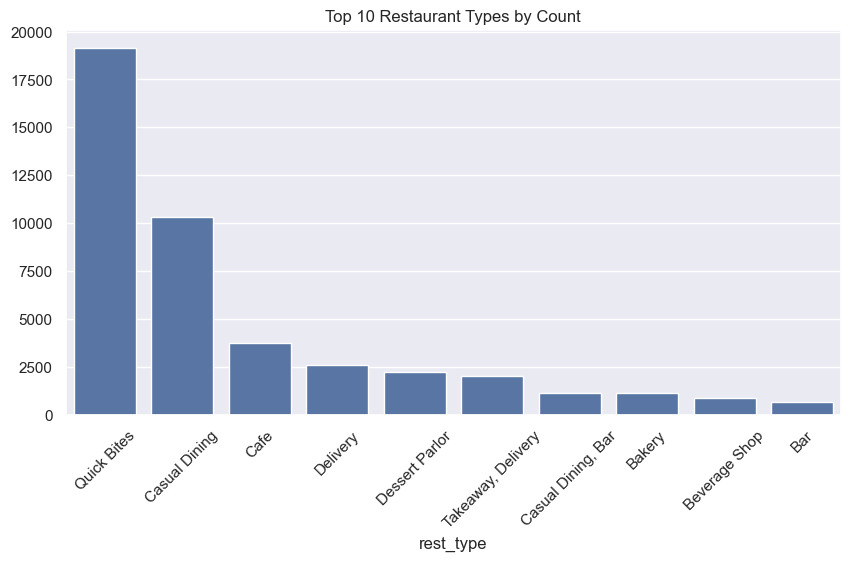

In [13]:
rest_types = df['rest_type'].value_counts().nlargest(10)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x=rest_types.index, y=rest_types.values)
plt.title('Top 10 Restaurant Types by Count')
plt.xticks(rotation=45)

cuisines

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'Biryani'),
  Text(4, 0, 'Bakery, Desserts'),
  Text(5, 0, 'Fast Food'),
  Text(6, 0, 'Desserts'),
  Text(7, 0, 'Cafe'),
  Text(8, 0, 'South Indian, North Indian, Chinese'),
  Text(9, 0, 'Bakery')])

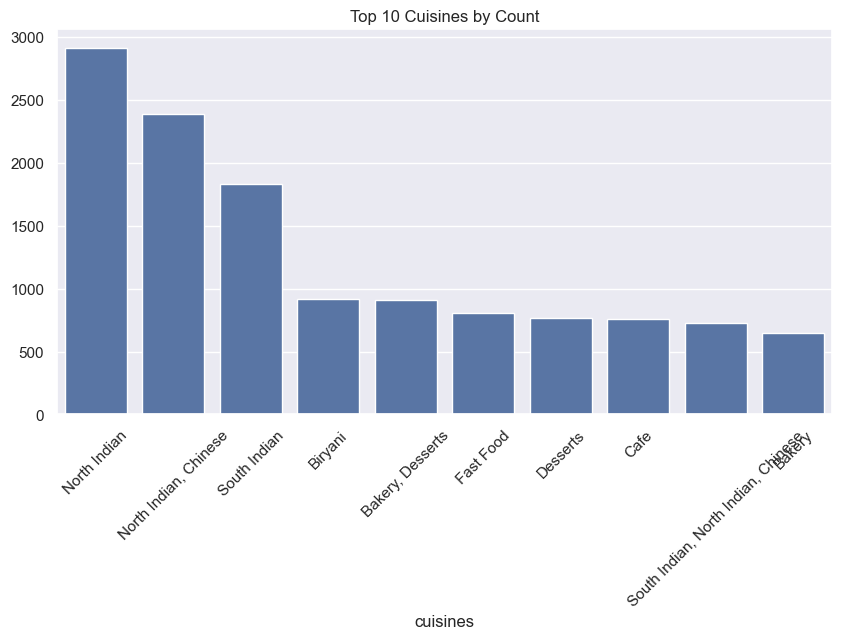

In [14]:
cuisines = df['cuisines'].value_counts().nlargest(10)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x=cuisines.index, y=cuisines.values)
plt.title('Top 10 Cuisines by Count')
plt.xticks(rotation=45)

listed_in(type)

Text(0.5, 1.0, 'Distribution of Restaurant Types')

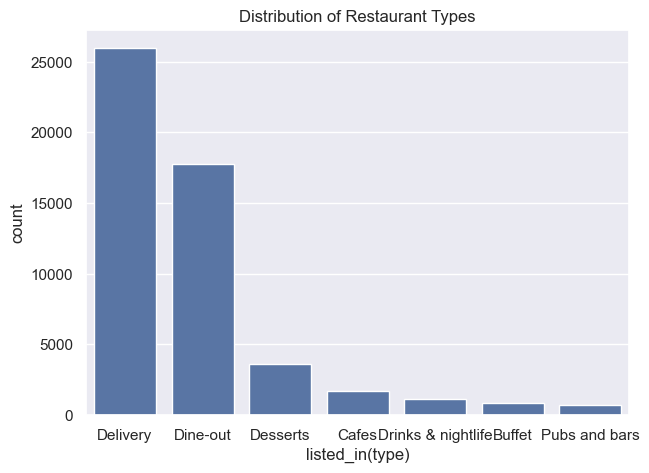

In [15]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x='listed_in(type)', data=df, order=df['listed_in(type)'].value_counts().index)
plt.title('Distribution of Restaurant Types')

listed_in(city)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'BTM'),
  Text(1, 0, 'Koramangala 7th Block'),
  Text(2, 0, 'Koramangala 5th Block'),
  Text(3, 0, 'Koramangala 4th Block'),
  Text(4, 0, 'Koramangala 6th Block'),
  Text(5, 0, 'Jayanagar'),
  Text(6, 0, 'JP Nagar'),
  Text(7, 0, 'Indiranagar'),
  Text(8, 0, 'Church Street'),
  Text(9, 0, 'MG Road')])

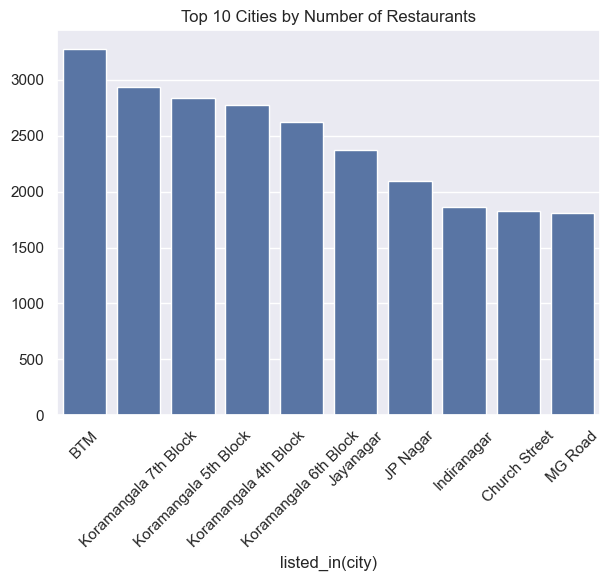

In [16]:
city= df['listed_in(city)'].value_counts().nlargest(10)
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x=city.index, y=city.values)
plt.title('Top 10 Cities by Number of Restaurants')
plt.xticks(rotation=45)


rate — Restaurant Ratings

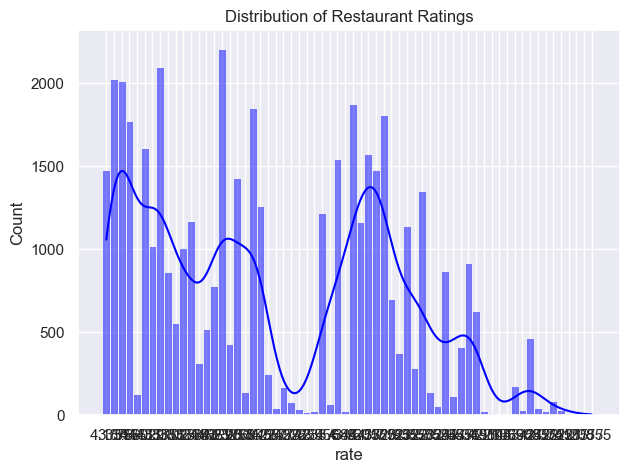

In [21]:
sns.histplot(df['rate'],bins=30, kde=True,color='blue')
plt.title('Distribution of Restaurant Ratings')
plt.show()


Number of votes

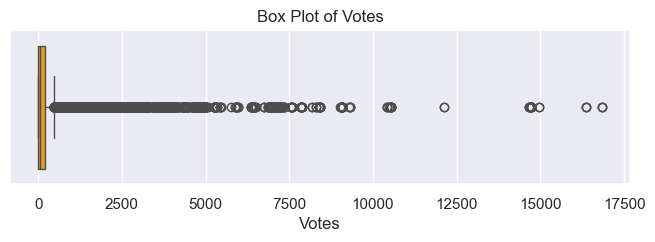

In [23]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['votes'], color='orange')
plt.title('Box Plot of Votes')
plt.xlabel('Votes')
plt.show()

Cost Distribution

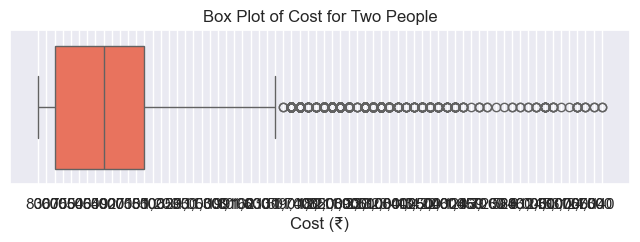

In [24]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['approx_cost(for two people)'], color='tomato')
plt.title('Box Plot of Cost for Two People')
plt.xlabel('Cost (₹)')
plt.show()


#### Bivariate Analysis